<a href="https://colab.research.google.com/github/Almasyriqi/PCVK_Genap_2022/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Modul 11 PCVK**

Nama : M. Syifa'ul Ikrom Almasyriqi

Kelas : TI-3G

NIM : 1941720057

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab 
terhubung dengan Github Anda, buat notebook baru dan beri nama “Week11.ipynb”. 
Kemudian import beberapa library dan akses folder yang ada di Drive Anda seperti pada jobsheet


> **Object Detection**

Metode yang digunakan : 
1. Template Matching
2. Edge Detection
3. Corner Detection
4. Grid Detection
5. Contour Detection

In [ ]:
# import library yang dibutuhkan
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# akses drive
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Implementasikan 6 metode template matching pada OpenCV dengan menggunakan 
gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya. 

> **Template Matching**

Menggunakan library openCV :   
**cv.matchTemplate(),** dengan parameter

*   **Image** citra input
*   **templ** template yang dicari, ukurannya tidak boleh lebih besar dari citra input 
* **method** metode dari template matching

Jenis metode template matching di opencv

1. TM_SQDIFF
2. TM_SQDIFF_NORMED
3. TM_CCORR
4. TM_CCORR_NORMED
5. TM_CCOEFF
6. TM_CCOEFF_NORMED



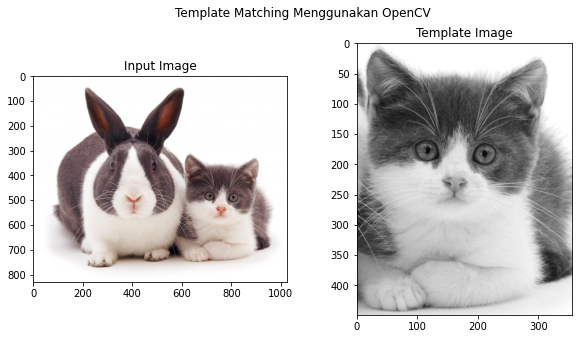

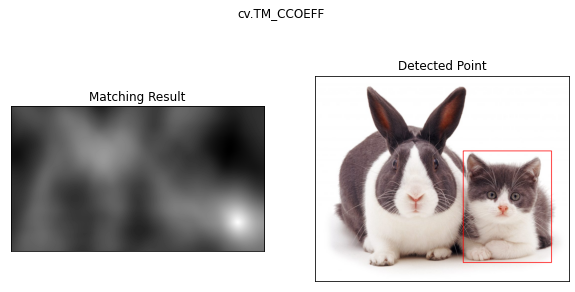

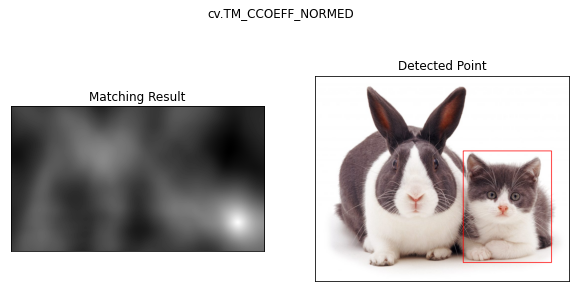

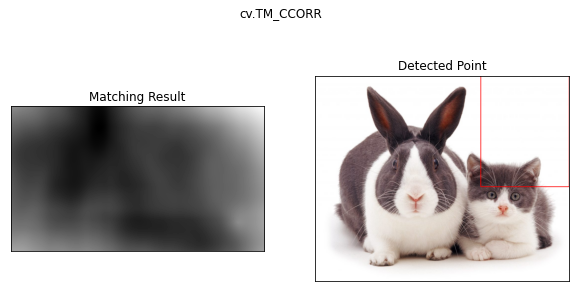

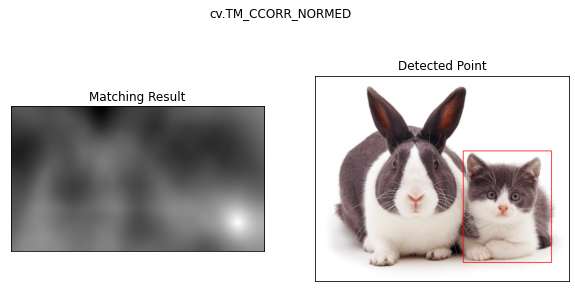

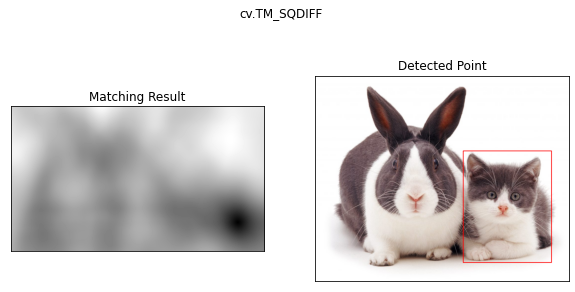

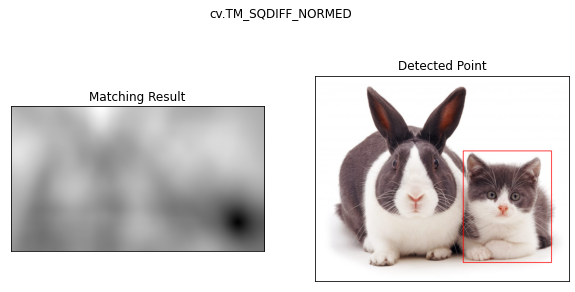

In [ ]:
# Template Matching Menggunakan OpenCV
image = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/cats_and_bunnies.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
templ = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/cat2_templatejpg.jpg', 0)
w, h = templ.shape[::-1]

# List metode template matching
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

# Menampilkan input image dan template image
plt.figure(figsize = (10,5))
plt.subplot(121),plt.imshow(image)
plt.title('Input Image')
plt.subplot(122),plt.imshow(templ,cmap = 'gray')
plt.title('Template Image')
plt.suptitle("Template Matching Menggunakan OpenCV")
plt.show()

# Loop setiap metode
for meth in methods:
    output_image = image.copy()
    img = image_gray.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img,templ,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(output_image,top_left, bottom_right, (255,0,0), 2)

    plt.figure(figsize = (10,5))
    plt.subplot(1,2,1),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(1,2,2),plt.imshow(output_image)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

3. Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian 
Edge Detection pada OpenCV dengan menggunakan gambar parking-lot-cars.jpg, 
sehingga menghasilkan luaran seperti pada jobsheet 


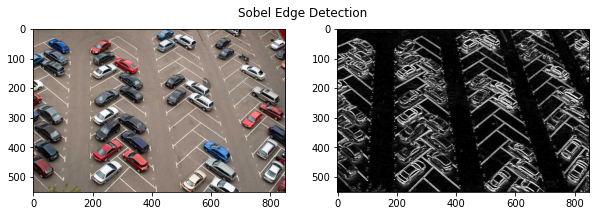

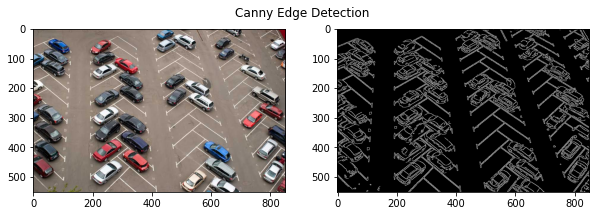

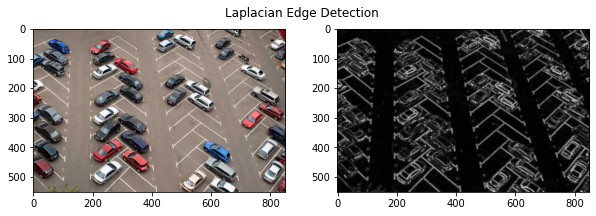

In [ ]:
# Edge Detection Menggunakan OpenCV

image = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/parking-lot-cars.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# remove noise
img = cv.GaussianBlur(image_gray,(3,3),0)
sobel = img.copy()
canny = img.copy()
laplacian = img.copy()
title = ["Sobel Edge Detection", "Canny Edge Detection", "Laplacian Edge Detection"]

# Edge detection menggunakan openCV
sobel = cv.Sobel(src=sobel, ddepth=cv.CV_64F, dx=0, dy=1, ksize=3) # Menggunakan sobel y filter
sobel = cv.convertScaleAbs(sobel) # konversi citra ke uint8
canny = cv.Canny(image=canny, threshold1=100, threshold2=200)
laplacian = cv.Laplacian(laplacian,cv.CV_64F, ksize=3)
laplacian =  cv.convertScaleAbs(laplacian) # konversi citra ke uint8
images = [sobel, canny, laplacian]

for i in range(3):
  plt.figure(figsize = (10,3))
  plt.subplot(121),plt.imshow(image)
  plt.subplot(122),plt.imshow(images[i], 'gray')
  plt.suptitle(title[i])
  plt.show()

4. Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada 
OpenCV dengan menggunakan gambar chess-board.jpg, sehingga menghasilkan 
luaran seperti pada jobsheet

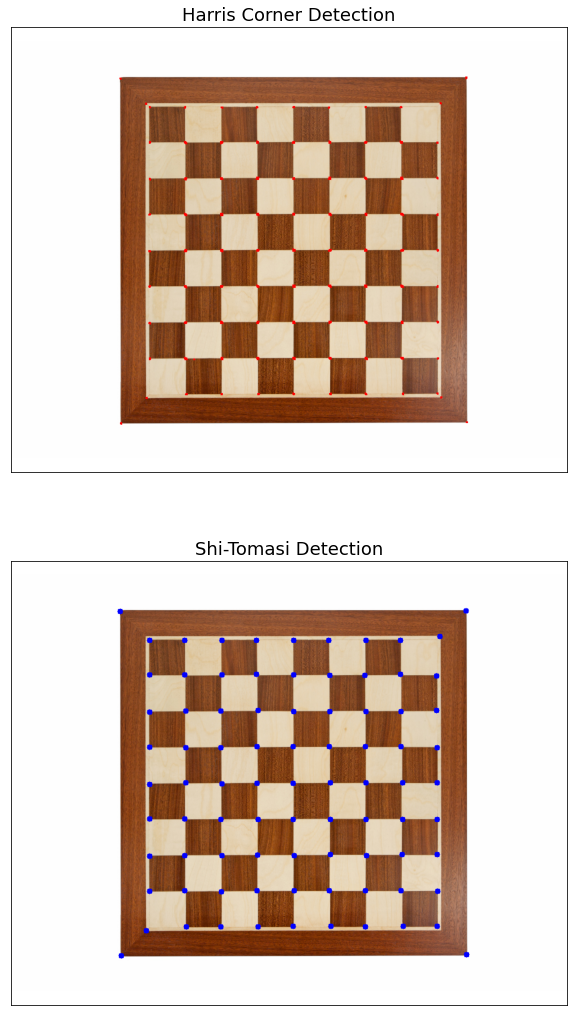

In [ ]:
# Implementasi metode Harris Corner Detection dan Shi-Tomasi Detection pada OpenCV
image = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/chess-board.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

harris = image.copy()
shi = image.copy()
image_gray = cv.cvtColor(harris, cv.COLOR_BGR2GRAY)
image_gray = np.float32(image_gray)
gray = cv.cvtColor(shi, cv.COLOR_BGR2GRAY)

# Implementasi Harris Corner Detection OpenCV
corner = cv.cornerHarris(image_gray,2,3,0.04)
corner = cv.dilate(corner,None)
harris[corner>0.01*corner.max()]=[255,0,0]

# Implementasi Shi-Tomasi Detection OpenCV
corners = cv.goodFeaturesToTrack(gray,85,0.01,10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv.circle(shi,(x,y),5,(0,0,255),-1)

# Membuat figure
plt.figure(figsize = (15,18))
plt.subplot(211),plt.imshow(harris)
plt.title('Harris Corner Detection', fontSize=18), plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(shi)
plt.title('Shi-Tomasi Detection', fontSize=18), plt.xticks([]), plt.yticks([])
plt.show()

5. Implementasikan metode Hough Transform pada OpenCV dengan menggunakan 
gambar sudoku.jpg. Tahapan proses grid detection sesuai yang terdapat pada ulasan 
teori, sehingga menghasilkan luaran seperti pada jobsheet

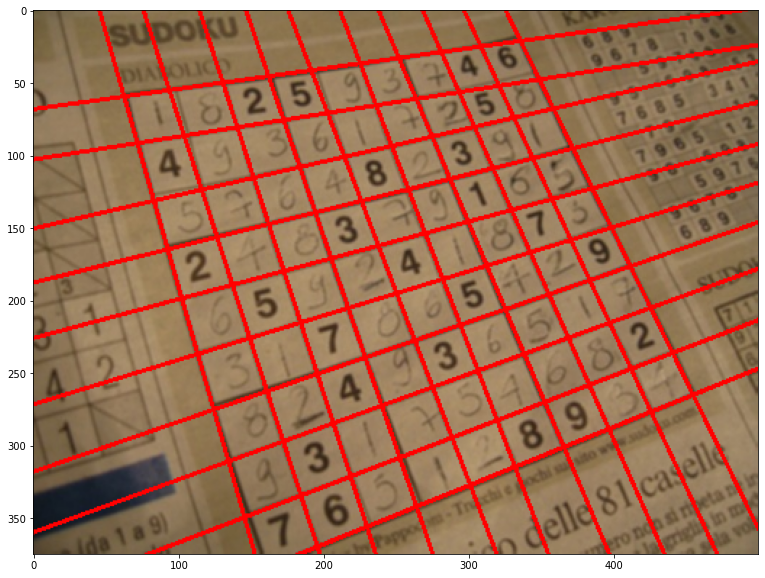

In [ ]:
# Implementasi metode Hough Transform pada OpenCV
image = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/sudoku.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Menerapkan Canny Edge Detection
edges = cv.Canny(image_gray,50,250,apertureSize = 3)

# Dilasi gambar tepi (Canny bisa menemukan kedua tepi pemisah pada grid sebagai tepi yang 
# berbeda, dilatasi dapat membuat kedua tepi ini bergabung lagi)
se = np.ones((3,3))
edges = cv.dilate(edges, se)

# Erosi (setelah proses dilasi, garis border menjadi tebal sehingga Hough akan mendeteksi banyak garis) 
se = np.ones((3,3))
edges = cv.erode(edges, se)

# Menerapkan  HoughLines dengan fungsi cv2.HoughLines() pada OpenCV
lines = cv.HoughLines(edges,1,np.pi/180,220)

# Menggabungkan garis yang mirip (similar)
rho_threshold = 15 
theta_threshold = 0.1

similar_lines = {i : [] for i in range(len(lines))} 
for i in range(len(lines)): 
  for j in range (len (lines)): 
    if i == j: 
      continue

    rho_i, theta_i = lines[i][0] 
    rho_j, theta_j = lines[j][0] 
    if abs(rho_i - rho_j) < rho_threshold and abs (theta_i - theta_j) < theta_threshold:
      similar_lines[i].append(j)

indices = [i for i in range(len(lines))] 
indices.sort(key=lambda x: len(similar_lines[x]))

line_flags = len(lines) *[True] 
for i in range(len(lines) - 1): 
  if not line_flags [indices[i]]: 
    continue

  for j in range(i + 1, len(lines)): 
    if not line_flags[indices[j]]:
      continue
    rho_i, theta_i = lines[indices[i]][0] 
    rho_j, theta_j = lines[indices[j]][0] 
    if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
      line_flags [indices[j]] = False
    
filtered_lines = []
for i in range(len(lines)): 
  if line_flags[i]:
    filtered_lines.append(lines[i])

for line in filtered_lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv.line(image,(x1,y1),(x2,y2),(255,0,0),2)

plt.figure(figsize = (15,10))
plt.imshow(image)

6. Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan 
menggunakan gambar laptop.jpg, sehingga menghasilkan luaran seperti pada jobsheet

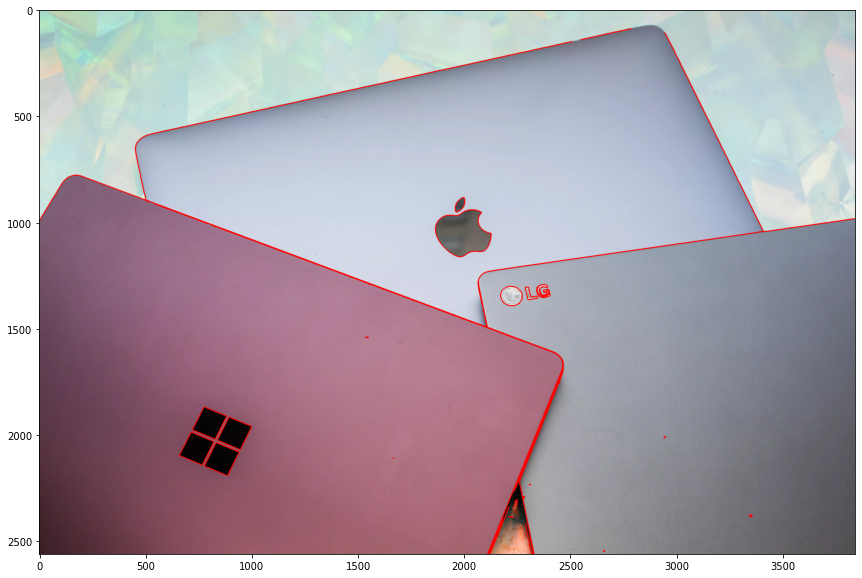

In [ ]:
# Implementasi fungsi findContours() pada OpenCV
image = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/laptop.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Menerapkan Canny Edge Detection
edged = cv.Canny(image_gray, 30, 200)

# Menerapkan fungsi findContours() openCV
contours, hierarchy = cv.findContours(edged, 
    cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
cv.drawContours(image, contours, -1, (255, 0, 0), 3)

plt.figure(figsize = (15,10))
plt.imshow(image)